In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import matplotlib
matplotlib.rcParams['figure.dpi'] = 700

In [2]:
filename = "../data/stat_sig_mets_whole_dataset_heatmap_updated_6_23.csv"


322
54


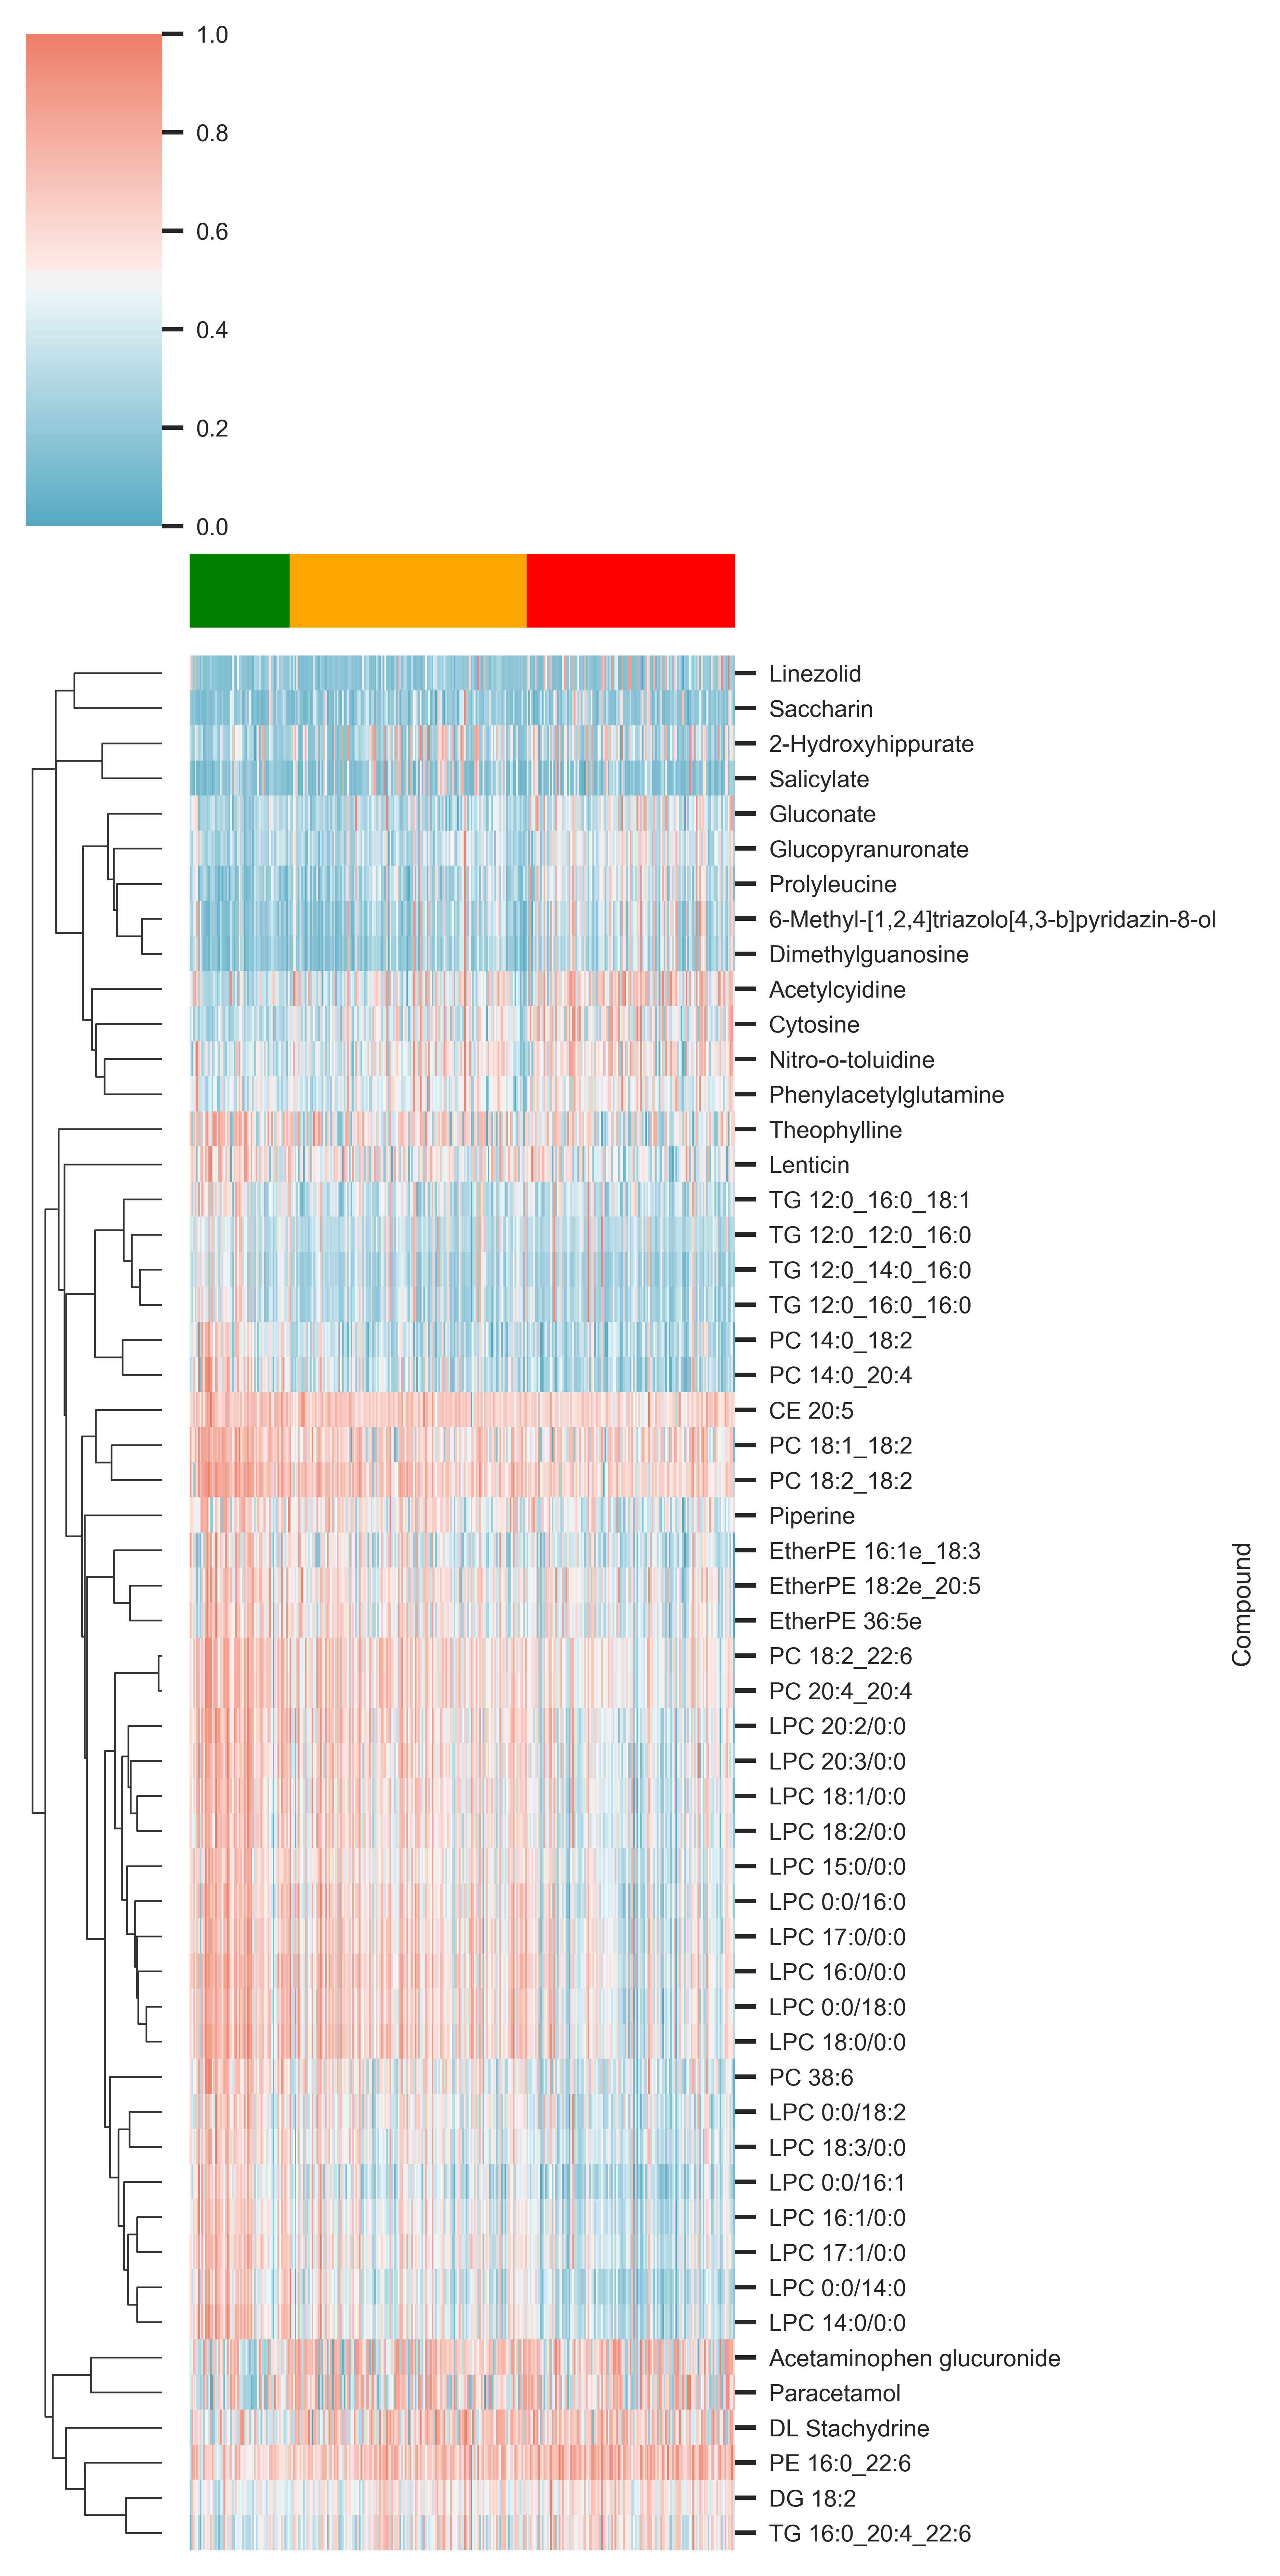

In [16]:
data = pd.read_csv(filename,index_col=0)
sb.set(font_scale=1.0)
def mapper(col_name):
    if "COVID-" in col_name:
        return "green"
    if "COVID+ ICU-" in col_name:
        return "orange"
    if "COVID+ ICU+" in col_name:
        return "red"
    else:
        print("error ", col_name)
        
col_colors = [mapper(x) for x in data.columns.values] 

order = list(range(len(col_colors)))
order.sort(key=lambda x: col_colors[x])

data = data.iloc[:,order]
col_colors = np.array(col_colors)[order]

print(len(data.columns))

print(len(data.index))

sb.set(font_scale=.6)
p = sb.clustermap(data,cmap = sb.diverging_palette(220, 20, l=65, center="light", as_cmap=True),standard_scale=0,col_cluster=False,xticklabels=False,col_colors=col_colors,figsize=(5,10))
plt.tight_layout()
p.savefig("../manuscript_figs/met_cluster_sig.png")

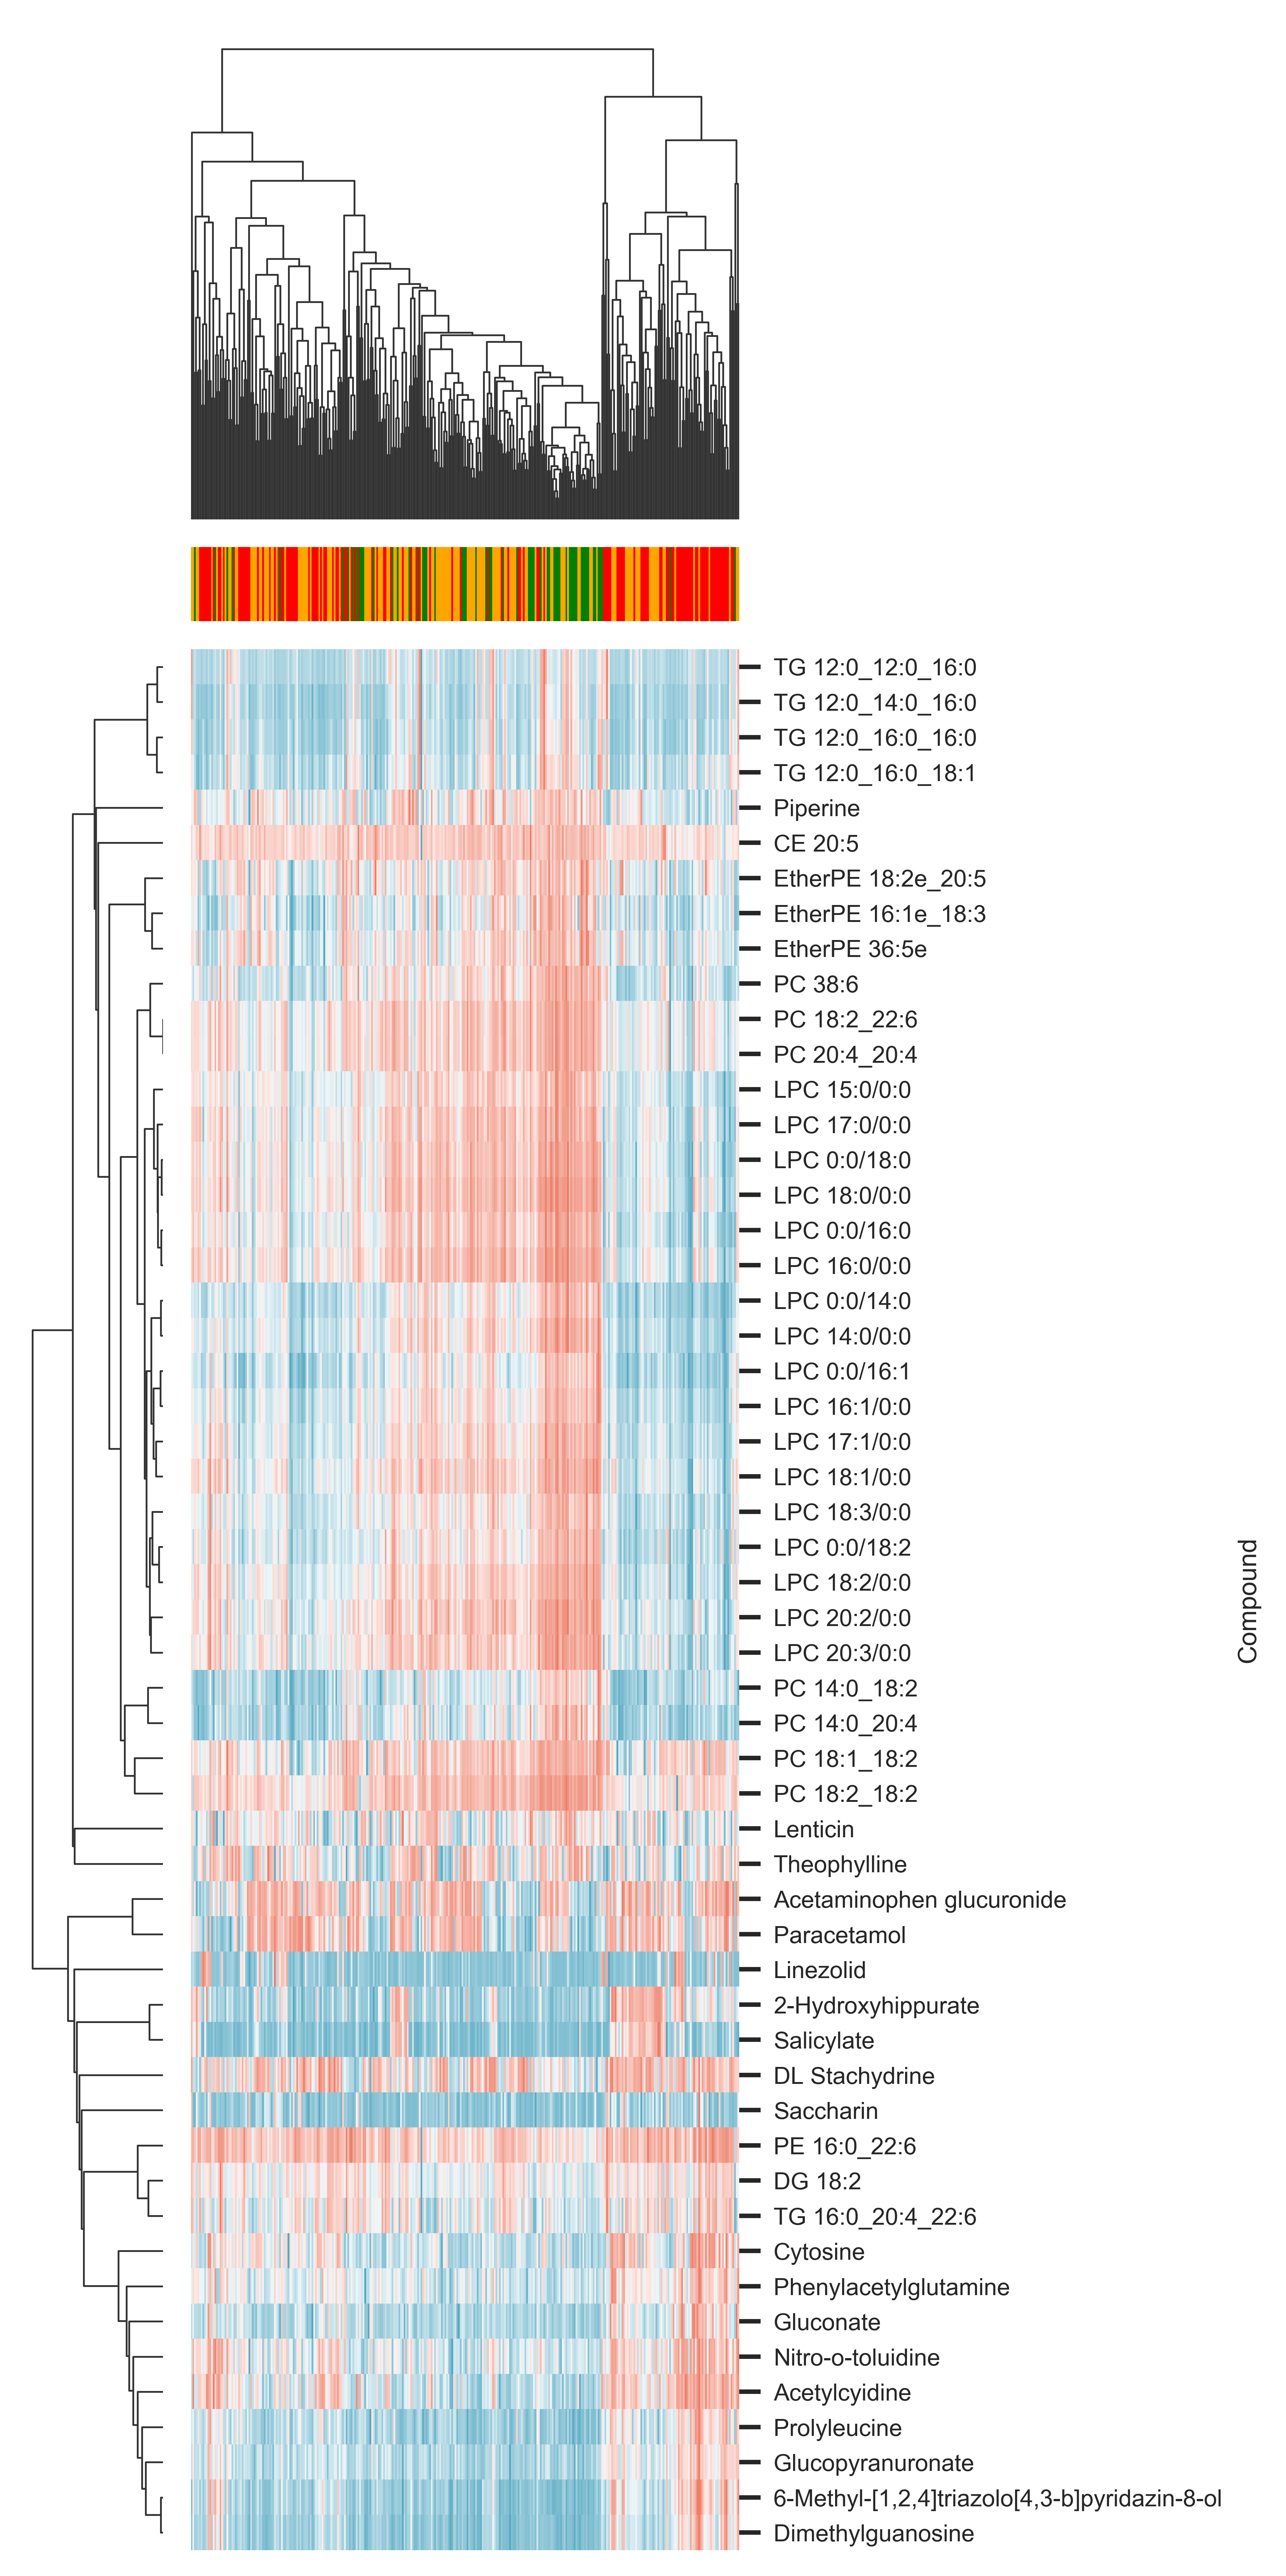

In [18]:
f = sb.clustermap(data,cbar_pos=None,cmap=sb.diverging_palette(220, 20, l=65, center="light", as_cmap=True),standard_scale=0,col_cluster=True,xticklabels=False,col_colors=col_colors,metric="correlation",figsize=(5,10))
plt.tight_layout()
f.savefig("../manuscript_figs/bicluster_heatmap.png")

In [5]:
data

,B2_WU350-017_d0_1681579b_2_1: Log2(normalized)_COVID-,B2_WU350-019_d0_1681566b_2_1: Log2(normalized)_COVID-,B2_WU350-020_d0_1681585b_2_1: Log2(normalized)_COVID-,B2_WU350-022_d0_1681572b_2_1: Log2(normalized)_COVID-,B2_WU350-024_d0_1681618b_2_1: Log2(normalized)_COVID-,B2_WU350-026_d0_1681633b_2_1: Log2(normalized)_COVID-,B2_WU350-040_d0_1681738b_2_1: Log2(normalized)_COVID-,B2_WU350-044_d0_1681757b_2_1: Log2(normalized)_COVID-,B2_WU350-045_d0_1681790b_2_1: Log2(normalized)_COVID-,B2_WU350-058_d0_1681901b_2_2: Log2(normalized)_COVID-,...,B9_WU350-374_d0_1695964b_1_2: Log2(normalized)_COVID+ ICU+,B9_WU350-376_d0_1694973b_1_2: Log2(normalized)_COVID+ ICU+,B9_WU350-377_d0_1695011b_1_2: Log2(normalized)_COVID+ ICU+,B9_WU350-389_d0_1695445b_1_2: Log2(normalized)_COVID+ ICU+,B9_WU350-390_d0_1695454b_1_2: Log2(normalized)_COVID+ ICU+,B9_WU350-391_d0_1695600b_1_2: Log2(normalized)_COVID+ ICU+,B9_WU350-393_d0_1695637b_1_2: Log2(normalized)_COVID+ ICU+,B9_WU350-394_d0_1695640b_1_2: Log2(normalized)_COVID+ ICU+,B9_WU350-397_d0_1695973b_1_2: Log2(normalized)_COVID+ ICU+,B9_WU350-398_d0_1695976b_1_2: Log2(normalized)_COVID+ ICU+
Compound,,,,,,,,,,,,,,,,,,,,,
Nitro-o-toluidine,-1.093704,-3.046349,-0.719368,1.760000,3.670000,-1.271589,0.162000,-2.292889,-1.644049,0.367000,...,0.644000,1.650000,-0.691002,0.676000,0.716000,0.044400,0.325000,2.920000,2.060000,-0.343000
"6-Methyl-[1,2,4]triazolo[4,3-b]pyridazin-8-ol",-0.067240,-0.338209,0.822580,1.172337,3.532177,-1.048252,1.189409,-0.632952,-1.117321,-1.363092,...,0.702497,2.660400,-0.546770,0.947056,-0.489538,-0.579058,0.578176,3.285563,2.141609,-0.163572
Acetaminophen glucuronide,-2.429493,-1.134849,2.103191,1.492411,-2.950691,-4.089219,-5.009222,-2.598546,4.625259,3.038288,...,-4.858886,5.784239,-4.980674,3.393068,-6.131412,4.419798,3.957632,2.885122,3.363270,0.155220
Cytosine,-0.797956,0.716858,-1.551257,-0.416916,-0.558248,-1.622657,-0.421074,-0.950750,-0.290623,-0.693443,...,0.082453,2.032625,-0.472179,2.210545,-1.071159,0.788410,1.961052,2.937290,3.316519,0.311762
DL Stachydrine,-4.113454,2.104343,-2.563023,0.330303,0.079218,-2.486509,0.402510,-2.181139,-4.133304,-1.502727,...,2.212935,-2.200436,-1.041906,3.360000,-5.225374,-4.787275,0.470024,2.579903,2.308914,-1.075996
Lenticin,0.512083,2.399748,1.389868,1.178953,-2.855137,0.284466,2.345842,3.071049,-0.259630,3.278645,...,-1.886423,1.116537,0.371199,0.677725,-0.265459,-4.115920,2.517122,0.262423,0.789532,-0.959402
Linezolid,6.022238,0.568998,0.342861,9.320000,0.057709,0.337336,-0.600763,1.161552,-0.874764,-0.813150,...,7.540000,2.335451,11.900000,0.603392,0.279345,-0.363230,12.600000,1.045147,0.687824,0.130814
Phenylacetylglutamine,0.530498,-0.327824,-0.254099,1.450000,5.000000,-1.391045,-1.149241,-0.841995,-0.503323,-2.218008,...,0.663065,1.590000,0.093798,-2.031218,0.231907,-0.180376,1.700000,2.980000,1.990000,-0.123682
Dimethylguanosine,-0.307260,-0.009853,0.478741,0.923603,3.181677,-0.832819,1.293037,-0.335470,-1.165947,-1.100863,...,0.516701,2.507637,-0.333109,0.909506,0.032690,-0.842907,0.793335,3.113405,2.105831,-0.305670


Text(0.5, 1.0, 'Theophylline')

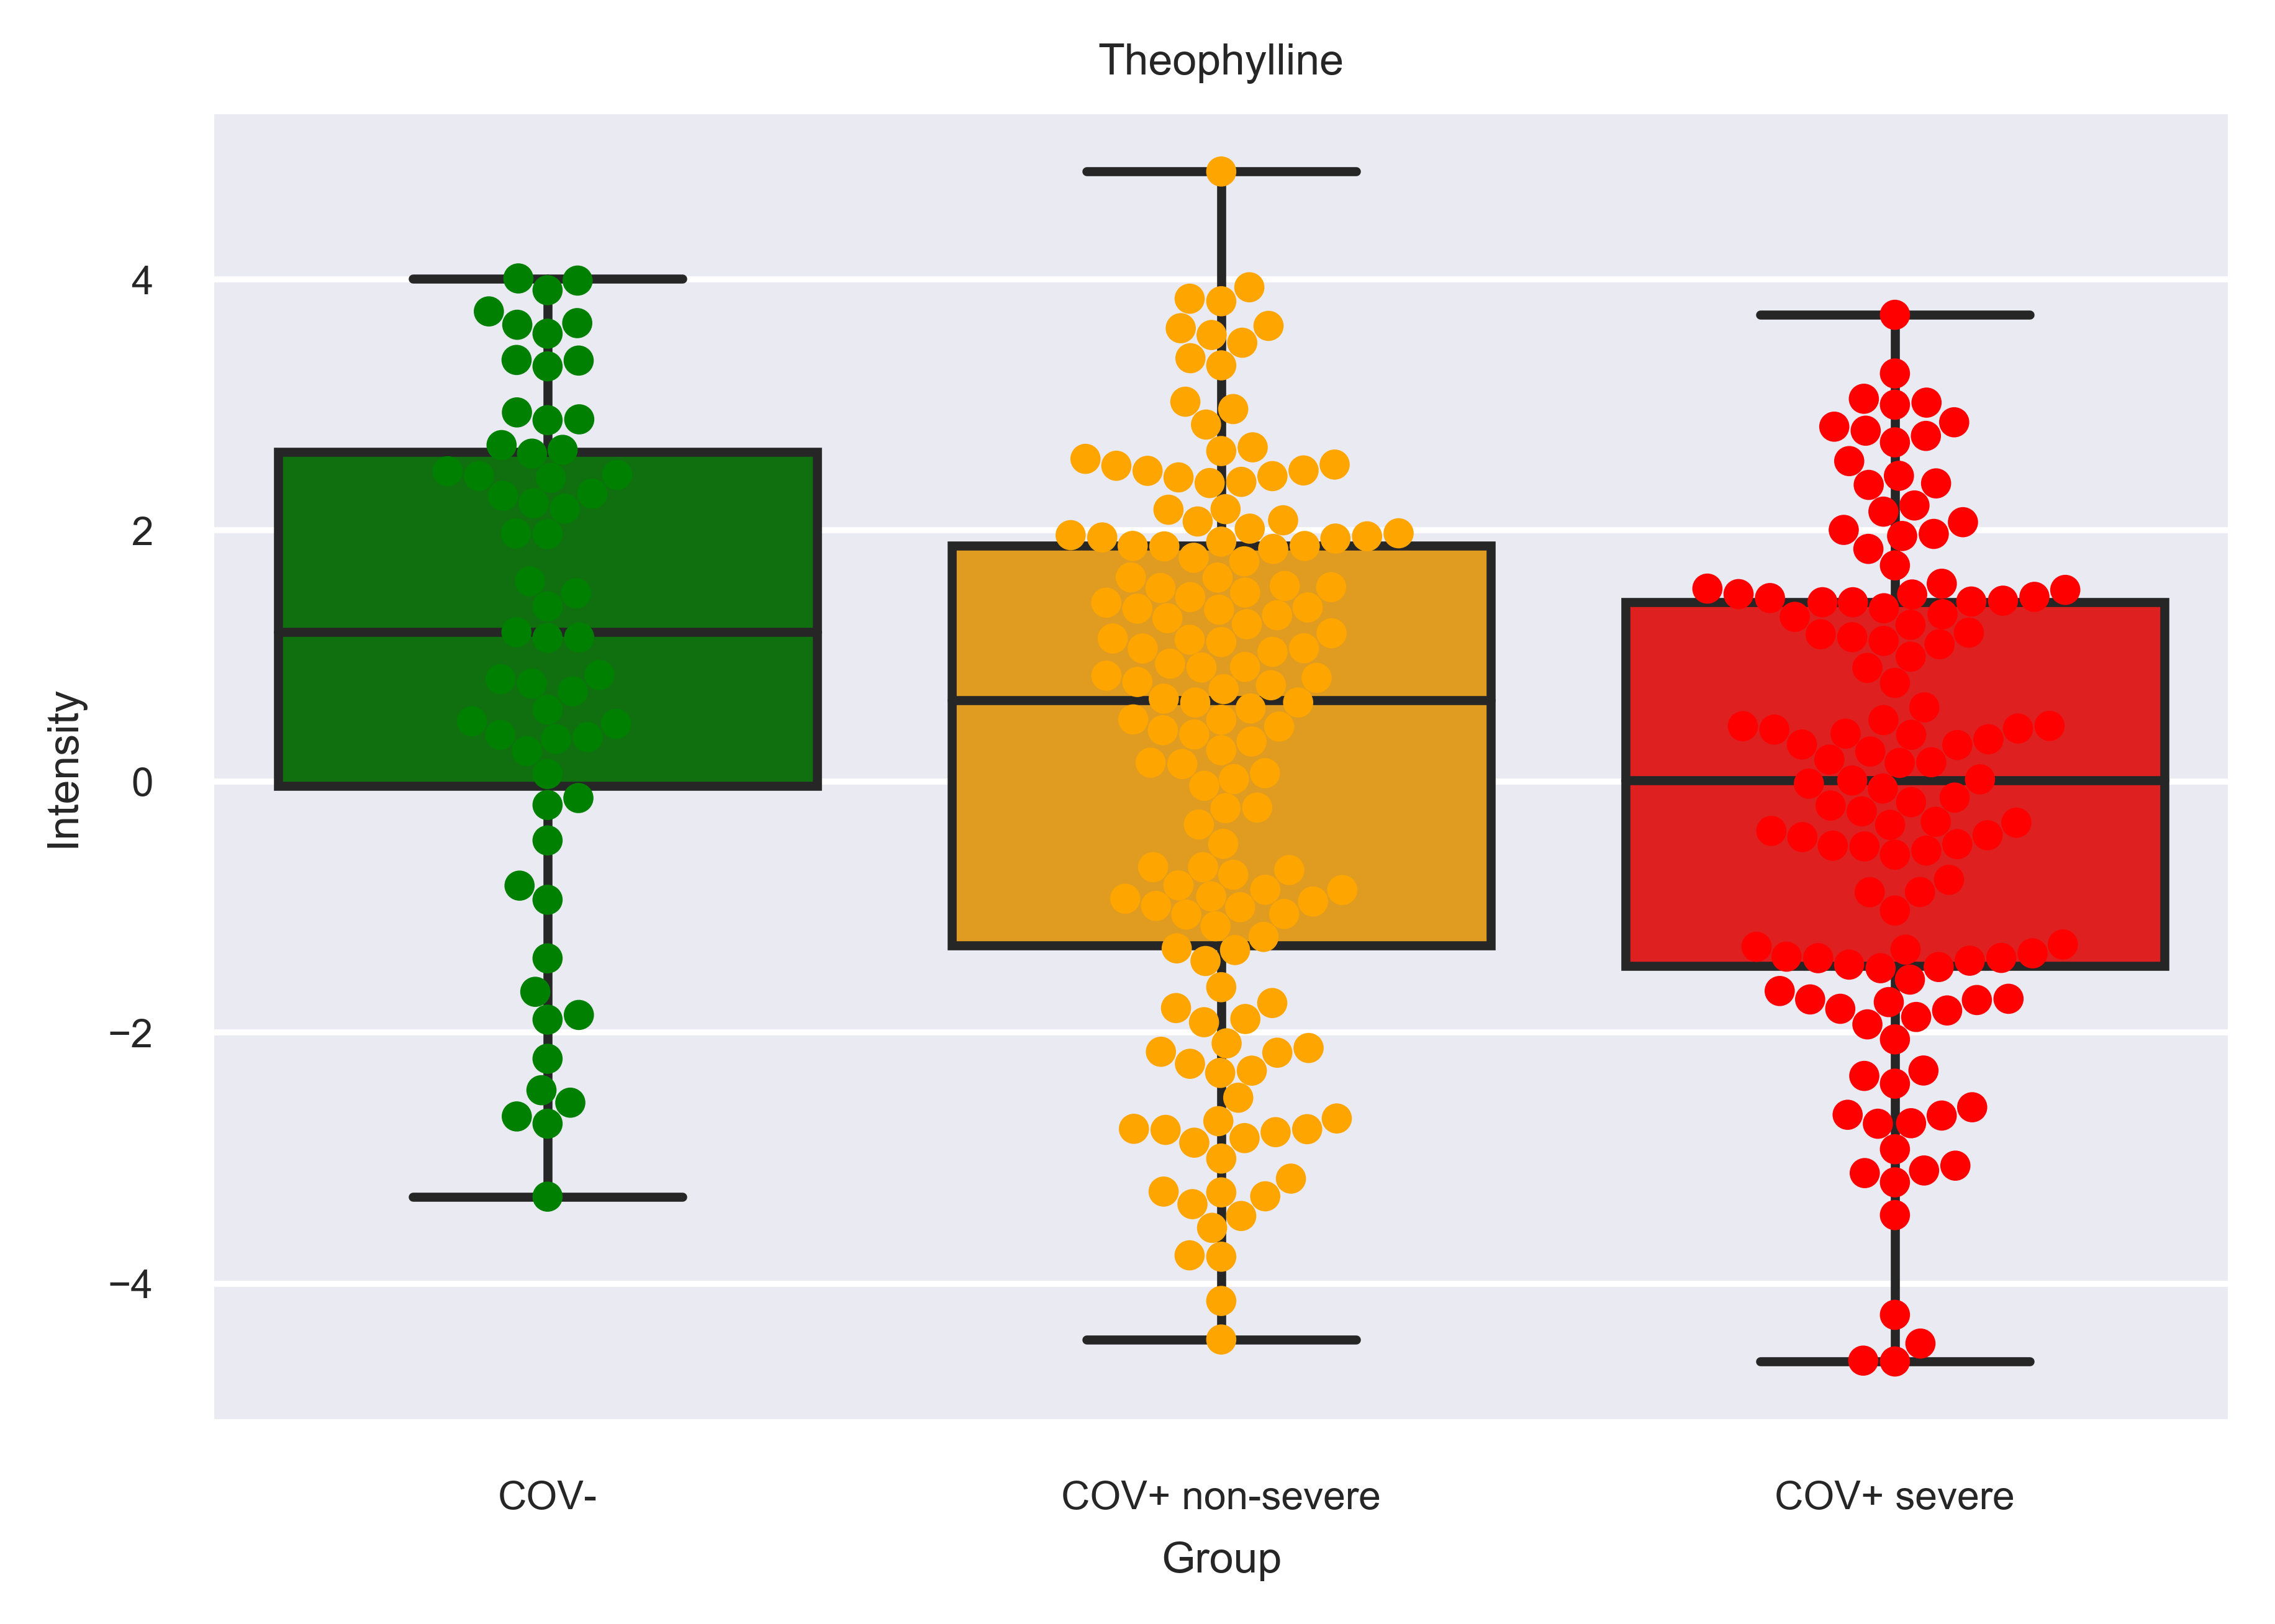

In [11]:
metName = "Theophylline"
df = {}
for col in data.columns.values:
    group = -1
    if "COVID-" in col:
        group = "COV-"
    if "COVID+ ICU-" in col:
        group = "COV+ non-severe"
    if "COVID+ ICU+" in col:
        group = "COV+ severe"
    df[len(df)] = {"Intensity":data.at[metName,col],"Group":group}
df = pd.DataFrame.from_dict(df,orient="index")
sb.boxplot(data=df,x="Group",y="Intensity",palette={"COV-":"green","COV+ non-severe":"orange","COV+ severe":"red"})
sb.swarmplot(data=df,x="Group",y="Intensity",dodge=True,palette={"COV-":"green","COV+ non-severe":"orange","COV+ severe":"red"})
plt.title(metName)